In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("myproject.csv")
df.sample(5)

,Watts,HRP,Operations
33,15.0,0.7,1
57,10.0,0.4,0
44,20.0,0.6,1
1,9.0,1.0,1
32,12.5,0.7,1


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('Operations',axis='columns'))
scaled_y = sy.fit_transform(df['Operations'].values.reshape(df.shape[0],1))

scaled_X

array([[0.        , 1.        ],
       [0.08333333, 1.        ],
       [0.125     , 1.        ],
       [0.16666667, 1.        ],
       [0.33333333, 1.        ],
       [0.375     , 1.        ],
       [0.58333333, 1.        ],
       [0.66666667, 1.        ],
       [1.        , 1.        ],
       [0.        , 0.9       ],
       [0.08333333, 0.9       ],
       [0.125     , 0.9       ],
       [0.16666667, 0.9       ],
       [0.33333333, 0.9       ],
       [0.375     , 0.9       ],
       [0.58333333, 0.9       ],
       [0.66666667, 0.9       ],
       [1.        , 0.9       ],
       [0.        , 0.8       ],
       [0.08333333, 0.8       ],
       [0.125     , 0.8       ],
       [0.16666667, 0.8       ],
       [0.33333333, 0.8       ],
       [0.375     , 0.8       ],
       [0.58333333, 0.8       ],
       [0.66666667, 0.8       ],
       [1.        , 0.8       ],
       [0.        , 0.7       ],
       [0.08333333, 0.7       ],
       [0.125     , 0.7       ],
       [0.

In [4]:
scaled_y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [5]:
scaled_y.reshape(99,)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.04):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.0228766 , 1.35817577]), -0.23341498587624993, 0.062036944095248174)

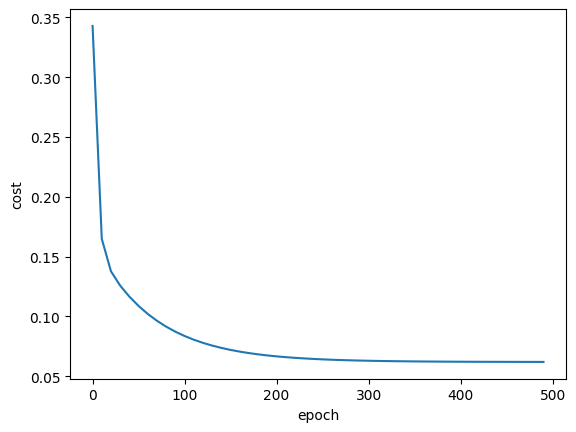

In [7]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [8]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(8.2,0.7,w,b)

/home/harry/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.7176893264328332

In [9]:
predict(16,0.5,w,b)

/home/harry/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.46092396085451576

In [12]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [13]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.04):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.41292862, 1.13242623]), -0.27249899435152347, 0.07437585676042467)

In [14]:
w , b 

(array([0.0228766 , 1.35817577]), -0.23341498587624993)

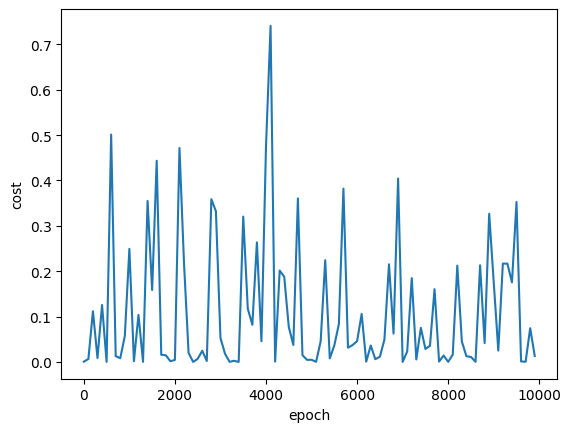

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [27]:
predict(8,0.8,w_sgd, b_sgd) 

/home/harry/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.6334419882770957

In [29]:
import cv2
import mediapipe as mp
import subprocess

cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()
mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

#Linux wifi code 
'''def turn_on_wifi():
    subprocess.call('nmcli radio wifi on', shell=True)
    print('Wi-Fi turned on')

def turn_off_wifi():
    subprocess.call('nmcli radio wifi off', shell=True)
    print('Wi-Fi turned off')'''

def turn_bluetooth_on():
  subprocess.call(["rfkill", "unblock", "bluetooth"])

def turn_bluetooth_off():
  subprocess.call(["rfkill", "block", "bluetooth"])

motion_detected = False  # Initialize motion detection flag to False

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fgmask = fgbg.apply(gray)

    # Apply a threshold to the foreground mask to obtain a binary image
    thresh = cv2.threshold(fgmask, 10, 255, cv2.THRESH_BINARY)[1]

    # Detect human motion by checking if a person is present in the frame
    results = mp_holistic.process(frame)
    if results.pose_landmarks:
        motion_detected = True
        turn_bluetooth_on()
        #turn_on_hotspot()
        cv2.putText(frame, "Motion Found", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        #cv2.putText(frame, "Device Status: Turned On", (30, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    else:
        motion_detected = False
        turn_bluetooth_off()
        #turn_off_hotspot()
        cv2.putText(frame, "No Motions Found", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2) 
        #cv2.putText(frame, "Devives Turned off", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)       

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
del mp_holistic